## Project: Campaign for selling personal loans.
The retail marketing department wants to devise campaigns with better target marketing to increase the success ratio with minimal budget.The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [1]:
#to enable plotting graphs
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
#for statistical plots
#it will split the dataframe into test and training set.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#it is to calculate the accuracy measure and create confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#reading the excel file into ploan_df variable.
ploan_df = pd.read_csv("F:\Great Learning\Data Science with Python\Project\Bank_Personal_Loan_Modelling-1.csv")

In [3]:
ploan_df_copy=ploan_df.copy() #making the copy of dataset

In [4]:
ploan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#dataframe number of rows and columns.
ploan_df.shape

(5000, 14)

In [6]:
ploan_df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [7]:
#Resequencing the column of dataframe. Taking the column 'Personal Loan' at the end column of dataframe
y=ploan_df
new_order=[0,1,2,3,4,5,6,7,8,10,11,12,13,9]
ploan_df=y[y.columns[new_order]]

In [8]:
ploan_df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [9]:
ploan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

### Que1: Read the column description and ensure you understand each attribute well
It has 14 colums. Divided into below categories:

1.'ID' and 'ZIP Code' columns don't has any singnificance as there is no association between both the columns and personal loan. These don't give any conclusion for the potential loan customer. we can drop these.

#### A). Binary category variables

1).Personal loan: response variable or Target variable.

2).Securities Account: Does the customer have a securities account with the bank? (0-> No 1--> Yes)

3).CD Account: Does the customer have a certificate of deposit (CD) account with the bank? (0-> No 1--> Yes)

4).Online: Does the customer use internet banking facilities? (0-> No 1--> Yes)

5).CreditCard: Does the customer use a credit card issued by UniversalBank? (0-> No 1--> Yes)

#### B). Categorical variable

1).Family: Family size of the customer

2).Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional


#### C). Interval variable (Quantitative vaariables)

1).Age: Customer's age in completed years

2).Experience: #years of professional experience

3).Income: Annual income of the customer ($ 000).

4). CCAvg: Avg. spending on credit cards per month ($000)

5).Mortgage: Value of house mortgage if any. ($ 000)

In [10]:
ploan_df[~ploan_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


In [11]:
ploan_df=ploan_df.drop(columns=['ID','ZIP Code'],axis=1)

In [12]:
#above query shows all the column has the values corresponding to their data type. No column has value of different data type.
#Now lets describe the data and check for the outliers if any.
#Dropped the column ID as no use of that.
ploan_df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0


In [13]:
#as to see output from the above query needed to scroll left and right. i.e. all data description was not fitted in a screen.
#so used function transpose() to change the orientation of the data.
ploan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [14]:
#in the above output if we see the data for Mortgage the value of mean and median is differ with large gap.
ploan_df.groupby(["Personal Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


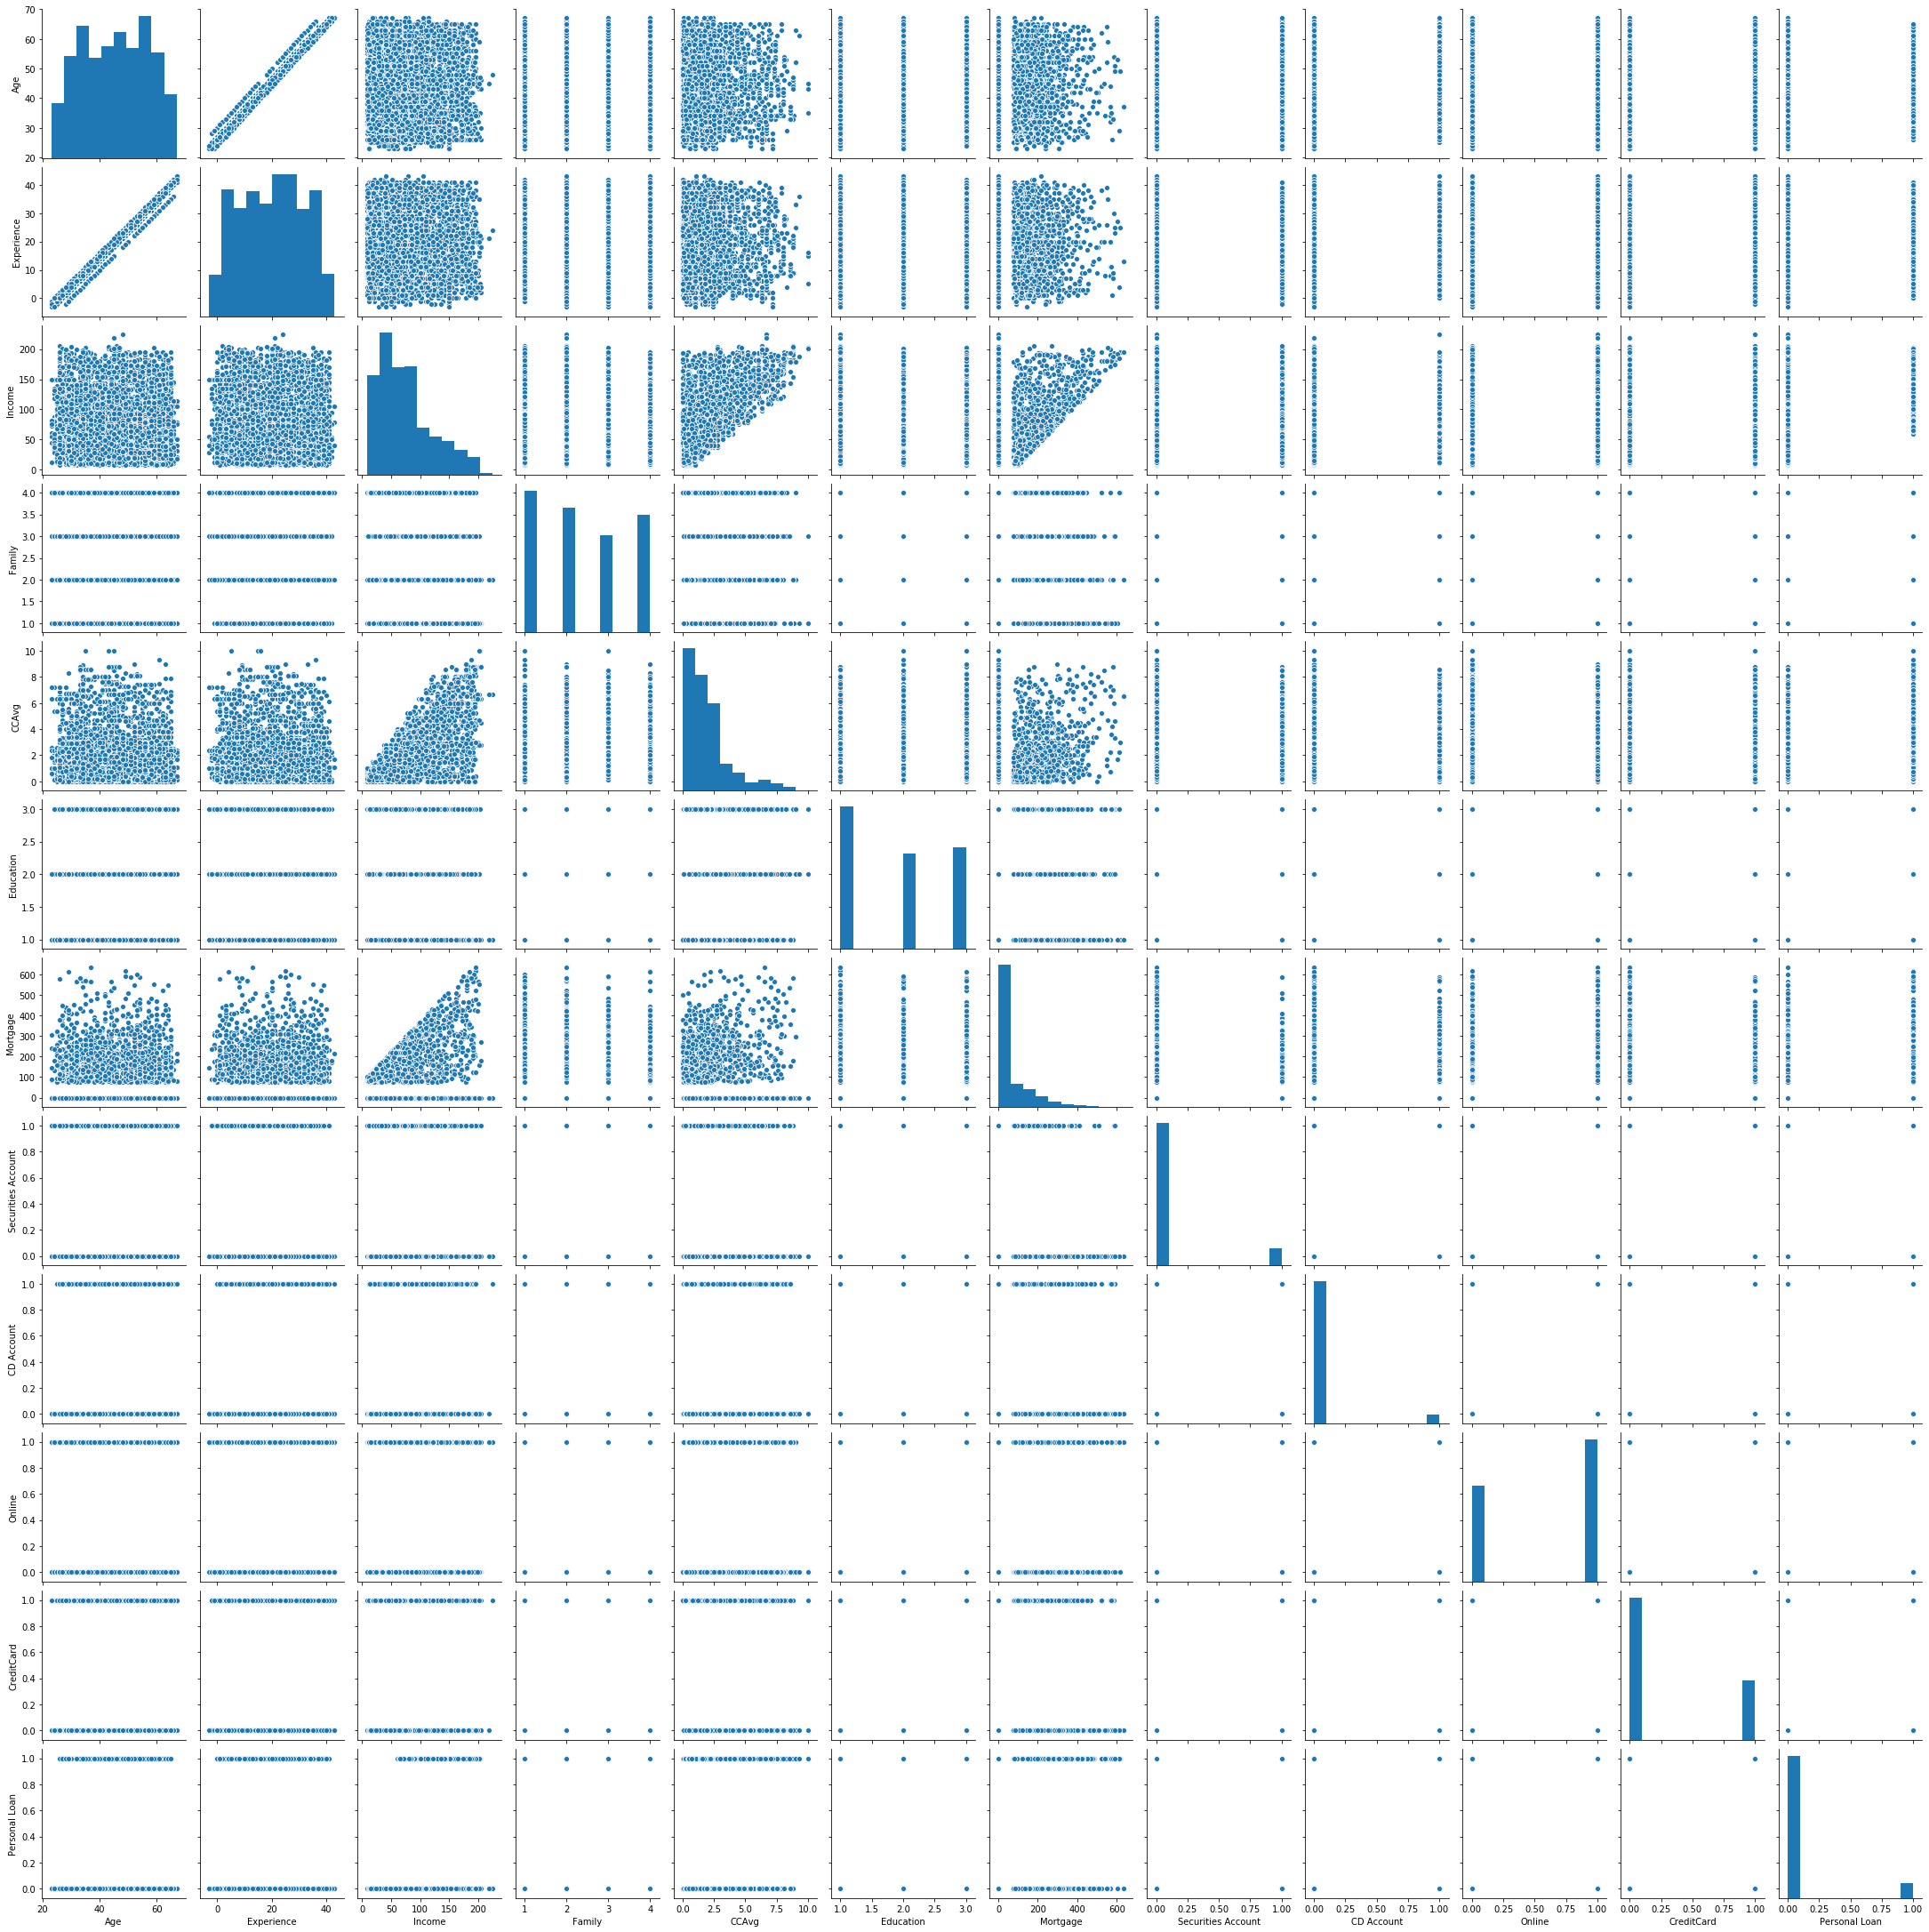

In [15]:
sns.pairplot(ploan_df)
plt.show()

### Que2: Study the data distribution in each attribute, share your findings

From the above describe statement and graph following are the finding:

1.Age: As we can see from describe that Mean and median is almost same and age of customer is mostly ditributed in between 35 and55.

2.Experience: the Mean and Median is almost same and most of the people have experience in between 10 and 30. But if we see the min years of experience the value is in negative (-3.0). it's not correct as experience cannot be negative. we can clean our dataframe removing negative values (-1,-2,-3).

3.Income: As Mean > Median, we can say it is positive skewed. From the plot, Most of the people have income in between 45k to 90k.

4.Family: From the plot we can see that family size is evenly distributed from 1 to 4.

5.CCAvg: As Mean > Median, we can say it is positive skewed. Avg spending is in between 0k to 25k.

6.Education: more customer are graduated at level 1.

7.Mortgage: There is large difference in between the mean and the median value of mortgage. As can see 50% of the people have mortgage 0k and around 70% have mortgage 50k. However max value is 635k.

8.Security account: This attributes tells us that majorly cutomers are not having Security account.

9.CD Account:This attributes tells us that majorly cutomers are not having CD account.

10.Online: More customers having internet banking or online.

11.CreditCard: This attribute has less customers using Credit card as those using credit card.


#### Data cleaning

As Column 'Exeperience' have -ve values, replacing all the -ve values with the median.

In [16]:
#we have seen above that we have some value of experiences as -ve and that's not correct as experience cannot be -ve. let's
#correct it. getting numbers of cutomers having -ve experience.
ploan_df[ploan_df['Experience'] < 0]['Experience'].count()

52

In [17]:
ploan_df['Experience'].replace( to_replace=[-1,-2,-3],value = np.nan,inplace = True )

In [18]:
#replacing the -ve value of experience with the mean value of 20.1.
ploan_df['Experience'].fillna(ploan_df['Experience'].median(),inplace=True)

In [19]:
ploan_df[ploan_df['Experience'] < 0]['Experience'].count()

0

In [20]:
#as we can see now there is no cutomer having experience aas -ve. let's check the describe statement.
ploan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


### Que3: Get the target column distribution. 

In [21]:
ploan_df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [22]:
ploan_df.groupby(["Personal Loan"]).mean().transpose()

Personal Loan,0,1
Age,45.367257,45.066667
Experience,20.378982,19.843750
Income,66.237389,144.745833
Family,2.373451,2.612500
CCAvg,1.729009,3.905354
Education,1.843584,2.233333
Mortgage,51.789381,100.845833
Securities Account,0.102212,0.125000
CD Account,0.035841,0.291667
Online,0.595796,0.606250


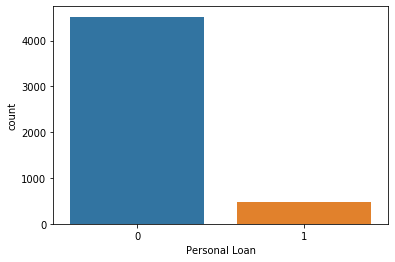

In [23]:
sns.countplot(ploan_df["Personal Loan"])
plt.show()

The customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Influence of Numerical variable on Target variable

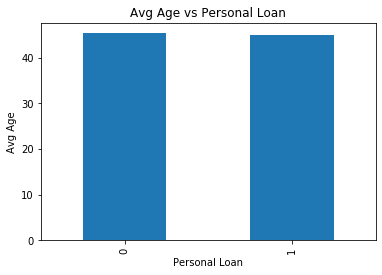

In [24]:
ploan_df.groupby('Personal Loan')['Age'].mean().plot(kind='bar')
plt.ylabel('Avg Age')
plt.title('Avg Age vs Personal Loan')
plt.show()

As we can see for the both who doesn't have and have personal loan, the average age is same.

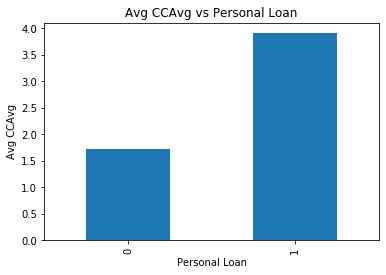

In [25]:
ploan_df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')
plt.ylabel('Avg CCAvg')
plt.title('Avg CCAvg vs Personal Loan')
plt.show()

It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

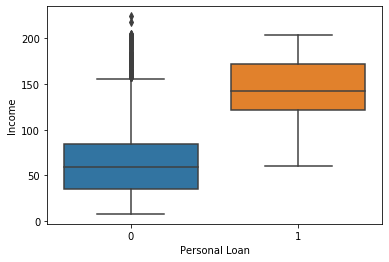

In [26]:
#let's proceed to check the influence on target variable.
sns.boxplot(x='Personal Loan',y='Income',data=ploan_df)
plt.show()

Observation: People having higher income more promt to have personal loan.

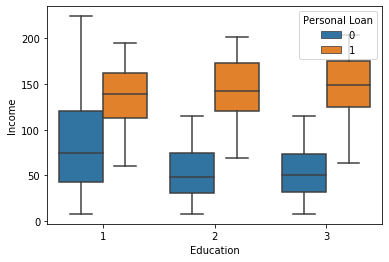

In [27]:
# Let's see influence of Education and income on personal loan.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=ploan_df)
plt.show()

1.cutomers who are of education level 2,3 are more favourable to have personal loan.

2.cutomer of education level 1 are having more income than other education level people.

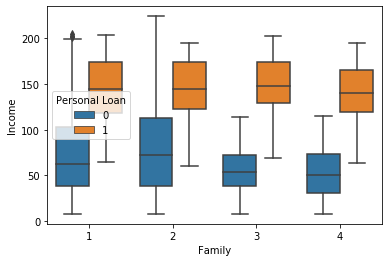

In [28]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=ploan_df)
plt.show()

All the cutomer having personal loan are from same income level irrespective of family size. family Size doesn't not having 
large impact on probability of having personal loan.

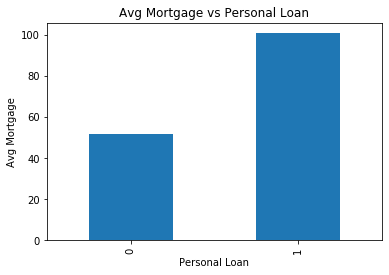

In [29]:
ploan_df.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')
plt.ylabel('Avg Mortgage')
plt.title('Avg Mortgage vs Personal Loan')
plt.show()

It shows that customers having high mortgage are more viable to personal loan.

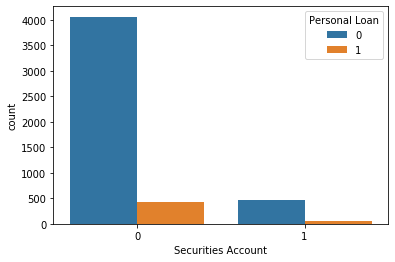

In [30]:
sns.countplot(x='Securities Account', data=ploan_df,hue='Personal Loan')
plt.show()

Cutomers who have security account don't have personal loan.

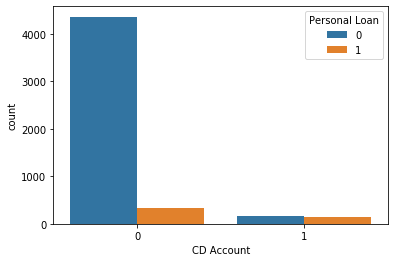

In [31]:
sns.countplot(x='CD Account', data=ploan_df,hue='Personal Loan')
plt.show()

Cutomer in majority who doesn't have CD account doesn't have personal loan. and almost all the cutomers who have CD account seems to have personal loan as well.

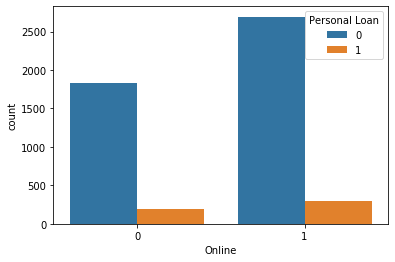

In [32]:
sns.countplot(x='Online', data=ploan_df,hue='Personal Loan')
plt.show()

The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans

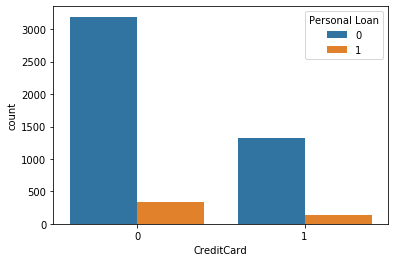

In [33]:
sns.countplot(x='CreditCard', data=ploan_df,hue='Personal Loan')
plt.show()

The customer who uses or doesn’t use a credit card, doesn’t seem to affect the probability of buying a personal loan.

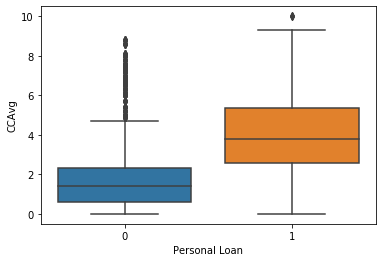

In [34]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=ploan_df)
plt.show()

Customers having personal loan have high credit card average. it shows that higher the credit card spending higher the chances 
of having personal loan and lower the credit card average lower the chances of having personal loan.

In [35]:
ploan_df.corr()
#sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355
Online,0.013702,0.013459,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006278


Observation: Age and Experience are having good correlation as value of correlation is aprrox 1. we can drop one of them.

In [36]:
ploan_df.drop(columns =['Experience'],inplace= True)
ploan_df.head(1)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0


### Que4: Split the data into training and test set in the ratio of 70:30 respectively

In [37]:
# select all rows and first 8 columns which are the attributes
array=ploan_df.values
X=array[:,0:10]
y=array[:,10]
test_size = 0.30
seed=100
#standardized_X = preprocessing.scale(X)
#normalized_X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
#model_score1 = model.score(X_train, y_train)

### Que5: Use different classification models (Logistic, Linear) to predict the likelihood of a liability customer buying personal loans

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression(multi_class='warn')
LogisticRegression(solver='warn')
#model_score1 = model.score(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)


0.9393333333333334


### Que6: Print the confusion matrix for all the above models.

In [40]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1342
         1.0       0.81      0.56      0.66       158

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.93      0.94      0.93      1500

0.9393333333333334
[[1321   21]
 [  70   88]]


False Positives (FP): we incorrectly predicted that they do have personal laon (a "Type I error") 21
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have personal loan (a "Type II error") 70
Falsely predict negative Type II error. (*Aim is to reduce the type II error for the best model*)

#### ROC Curve

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
#plt.figure()
roc_auc1=metrics.auc(fpr,tpr)
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (fpr)')
# plt.ylabel('True Positive Rate (tpr)')
# plt.title('ROC curve')
# plt.legend(loc="lower right")
# plt.show()
print("Area under the ROC curve : %f" %roc_auc1)

Area under the ROC curve : 0.953913


### Model Evaluation

Here we have build logistic classification model and calculated the confusion matrix parameters. 

If we look at the accuracy or model score is around 94% and that is too good. But in this case we know that the percentage of the person having personal loan to not having personal loan is very less. Hence accuracy won't play major role here to get the model performance.

In time, we can observe above confusion matrix and look for the recall '1' case, in this case it is 56%. So it means out of total number of customer actually having personal loan, we were only able to predict 56% of them correctly.

*Also the accuracy is measured by the area under the ROC curve. and the value of the AUC is 0.95, that's good.*

### STANDARDIZATION

*In our datafram we have different scale and unit of data. We can start comaparing these data once done with standardization. This will increase the accuracy of the models.*

In [42]:
column_name=ploan_df.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [43]:
model.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predict1=model.predict(scaled_X_test)

In [45]:
print(metrics.classification_report(y_test,y_predict1))
print(metrics.accuracy_score(y_test,y_predict1))
print(metrics.confusion_matrix(y_test, y_predict1))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1342
         1.0       0.88      0.56      0.68       158

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.94      0.95      0.94      1500

0.9453333333333334
[[1330   12]
 [  70   88]]


There is increase of accuracy of 0.6% after standardization of the data. As seen before accuracy alone can't define how well model predicted. But in this recall '1' has not increased. Let's analyze other models.

### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model=GaussianNB()
nb_model.fit(scaled_X_train,y_train)
y_predict=nb_model.predict(scaled_X_test)

In [48]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      1342
         1.0       0.48      0.59      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500

0.8886666666666667
[[1239  103]
 [  64   94]]


In [49]:
# logit_roc_auc = roc_auc_score(y_test, model.predict(scaled_X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(scaled_X_test)[:,1])
roc_auc1=metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" %roc_auc1)

Area under the ROC curve : 0.931073


**Conclusion:** *We got an accuracy of around 89% and recall as 59%, which are very less. Hence Naive beyes is not perfect model for our dataset.*

### kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
kNN_model=KNeighborsClassifier(n_neighbors=3) #number of neighbors considered 3
kNN_model.fit(scaled_X_train,y_train)
y_predict=kNN_model.predict(scaled_X_test)

In [52]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1342
         1.0       0.93      0.66      0.77       158

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500

0.9586666666666667
[[1334    8]
 [  54  104]]


In [53]:
fpr, tpr, thresholds = roc_curve(y_test, kNN_model.predict_proba(scaled_X_test)[:,1])
roc_auc1=metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" %roc_auc1)

Area under the ROC curve : 0.909803


*Here we are with an accuracy of around 96%. Also the recall value is 66%, that's much better than Logistic and Naive beyes model classification model.*

### Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_model=DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_model.fit(scaled_X_train,y_train)
y_predict=dt_model.predict(scaled_X_test)

In [56]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1342
         1.0       0.97      0.87      0.92       158

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

0.9833333333333333
[[1337    5]
 [  20  138]]


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(scaled_X_test)[:,1])
roc_auc1=metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" %roc_auc1)

Area under the ROC curve : 0.934846


Here we get the awesome accuracy of around 98% and recall '1' is 87%. Both the values are much better than the Logistic, Naive beyes and kNN model of classification.

**Let's look at the decision tree with criterion = 'gini'.**

In [58]:
dt_model=DecisionTreeClassifier(criterion='gini', random_state=1)
dt_model.fit(scaled_X_train,y_train)
y_predict=dt_model.predict(scaled_X_test)
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1342
         1.0       0.93      0.89      0.91       158

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

0.982
[[1332   10]
 [  17  141]]


In [59]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(scaled_X_test)[:,1])
roc_auc=metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" %roc_auc)

Area under the ROC curve : 0.942477


*Wow...,here we got the recall '1' value as 89% with the 98% accuracy that's really good.*

### Que7: Give your reasoning on which is the best model in this case and why it performs better?

**In this case Decision tree classification is the best model as the acuuracy is around 98% with the recall value of 89%, that's better comapare to other models liike Logistic, kNN and Naive beyes model.**

Logistic regression gave the accuracy around 94% that's good but alone accuracy can't define the model. If we look at recall percentage is 56% which is very less. 

Naive beyes model gave the accuracy as 88%, which is less and not perfect model for this dataset.

kNN model gaving good accuracy of 96%, but the recall value is 66% only. This also doesn't give more accuracy than decision tree model.

## Hence, we can determine that:  Decision tree classification is the best optimal model for this dataset according to above analytics.